In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

In [2]:
train_data=pd.read_csv('/content/drive/MyDrive/ExcelR/Assignment/Naive Bayes/SalaryData_Train.csv')

In [3]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_data=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Naive Bayes/SalaryData_Test.csv")

In [5]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train_data.shape

(30161, 14)

In [7]:
test_data.shape

(15060, 14)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
train_data.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
test_data.isin(["?"]).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
print(train_data[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [15]:
categorical=[var for var in train_data.columns if train_data[var].dtype=='O'] #-----------------------------
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are :\n\n",categorical)


There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [16]:
train_data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [17]:
train_data[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [18]:
for var in categorical:
    print(train_data[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [19]:
for var in categorical:
    print(train_data[var].value_counts()/np.float(len(train_data)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [20]:
train_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [21]:
train_data.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [22]:
train_data.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [23]:
train_data.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
train_data.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [25]:
train_data.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [26]:
for var in categorical:
    print(var,'contains',len(train_data[var].unique()),'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


In [27]:
numerical=[var for var in train_data.columns if train_data[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print("The numerical variables are:",numerical)

There are 5 numerical variables

The numerical variables are: ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [28]:
train_data[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


There are 5 numerical variables:"age","educationno","capitalgain","capitalloss","hoursperweek".

All of the numerical variables are of discrete data type.

## **Explore problems within numerical variables**

In [29]:
train_data[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

# **Declare feature vector and target variable**

In [30]:
X=train_data.drop(["Salary"],axis=1)
Y=train_data["Salary"]

# **Split data into separate training and testing set**

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [32]:
X_train.shape,X_test.shape

((21112, 13), (9049, 13))

# **Feature Engineering**

In [33]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [34]:
X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [35]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [36]:
numerical=[col for col in X_train.columns if X_train[col].dtypes!='O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [37]:
X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [38]:
for col in categorical:
  if X_train[col].isnull().mean()>0:
    print(col,(X_train[col].isnull().mean()))

In [39]:
for df2 in [X_train,X_test]:
    df2["workclass"].fillna(X_train["workclass"].mode()[0],inplace=True)
    df2["occupation"].fillna(X_train['occupation'].mode()[0],inplace=True)
    df2['native'].fillna(X_train["native"].mode()[0],inplace=True)

In [40]:
X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [41]:
X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [42]:
X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [43]:
X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

# **Encode Categorical Variables**

In [44]:
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [45]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
8166,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
7138,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States
437,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States
5436,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6541,Self-emp-not-inc,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States


In [46]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 600 kB/s 


In [47]:
import category_encoders as ce

In [48]:
encoder=ce.OneHotEncoder(cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [49]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train.shape

(21112, 102)

We can see that from the initial 14 columns, now we have 102 columns

In [51]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [52]:
X_test.shape

(9049, 102)

# **Feature Scaling**

In [53]:
cols=X_train.columns

In [54]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [55]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])


In [56]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315789,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.842105,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we have X_train dataset ready to be fed into Gaussian Naive Bayes Classifier.

# **Model Training**

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

# **Predict the results**

In [59]:
y_pred=gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

# **Check accuracy score**

In [60]:
from sklearn.metrics import accuracy_score
print('Model accuracy score is {0:0.4f}'.format(accuracy_score(Y_test,y_pred)))

Model accuracy score is 0.7995


# **Compare the train-set and test-set accuracy**

In [61]:
y_pred_train= gnb.predict(X_train)
y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [62]:
print("Training-set accuracy score:{0:0.4f}".format(accuracy_score(Y_train,y_pred_train)))

Training-set accuracy score:0.8023


# **Check of Underfitting or overfitting**

In [63]:
print("Training set score:{0:0.4f}".format(gnb.score(X_train,Y_train)))
print("Test set score:{0:0.4f}".format(gnb.score(X_test,Y_test)))

Training set score:0.8023
Test set score:0.7995


Score of training set is 0.8023 and Test set is 0.7995, so it seems these two score are quite comparable. So there is not overfitting or underfitting

# **Comapare model accuracy with null accuracy**

In [64]:
Y_test.value_counts()

 <=50K    6798
 >50K     2251
Name: Salary, dtype: int64

In [65]:
null_accuracy= (7407/(7407+2362))
print("Null accuracy score:{0:0.4f}".format(null_accuracy))

Null accuracy score:0.7582


Our model accuracy is 0.8023 and null accuracy is 0.7582 which signify that Our model predictions are very good.

# **Confusion Matrix**

In [66]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,y_pred)
print("Confusion Matrix\n\n",cm)
print("\n True Positives(TP)=",cm[0,0])
print("\n True Negatives(TN)=",cm[1,1])
print("\n False Positive(FP)=",cm[0,1])
print("\n False Negative(FN)=",cm[1,0])

Confusion Matrix

 [[5422 1376]
 [ 438 1813]]

 True Positives(TP)= 5422

 True Negatives(TN)= 1813

 False Positive(FP)= 1376

 False Negative(FN)= 438


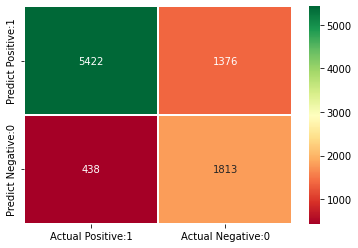

In [67]:
cm_matrix = pd.DataFrame(data=cm,columns=["Actual Positive:1","Actual Negative:0"],index=["Predict Positive:1","Predict Negative:0"])
sns.heatmap(cm_matrix,annot=True, fmt='d',linewidth=.5,linecolor="white",cmap="RdYlGn")

# **Classification Metrics**

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      6798
        >50K       0.57      0.81      0.67      2251

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



# **Classification Accuracy**

In [69]:
TP=cm[0,0]
TN=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]


In [70]:
classification_accuracy=(TP+TN)/ float(TP+TN+FP+FN)
print("Classification Accuracy:{0:0.4f}".format(classification_accuracy))

Classification Accuracy:0.7995


# **Classification Error**

In [71]:
classification_error=(FP+FN)/float(TP+TN+FP+FN)
print("Classification_error:{0:0.4f}".format(classification_error))

Classification_error:0.2005


# **Precision**

In [72]:
precision=TP/float(TP+FP)
print("Precision:{0:0.4f}".format(precision))

Precision:0.7976


# **Recall**

In [73]:
recall=TP/float(TP+FN)
print("Recall:{0:0.4f}".format(recall))

Recall:0.9253


# **True Positive Rate**

In [74]:
true_positive_rate=TP/float(TP+FN)
print("True Positive Rate:{0:0.4f}".format(true_positive_rate))

True Positive Rate:0.9253


# **False Positive Rate**

In [75]:
false_positive_rate=FP/float(FP+TN)
print("False positive rate:{0:0.4f}".format(false_positive_rate))

False positive rate:0.4315


# **Specificity**

In [76]:
specificity= TN/(TN+FP)
print("Specificity:{0:0.4f}".format(specificity))

Specificity:0.5685


# **Calculate class probablities**

In [77]:
y_pred_prob=gnb.predict_proba(X_test)[0:10]
y_pred_prob

array([[9.99955511e-01, 4.44887598e-05],
       [9.95935549e-01, 4.06445120e-03],
       [8.63901480e-01, 1.36098520e-01],
       [9.99999906e-01, 9.37239455e-08],
       [8.80888343e-02, 9.11911166e-01],
       [9.99562896e-01, 4.37103927e-04],
       [5.34482750e-06, 9.99994655e-01],
       [6.28497161e-01, 3.71502839e-01],
       [5.46536963e-04, 9.99453463e-01],
       [9.99999570e-01, 4.30495598e-07]])

Observations:

~ In each row, the numbers sum to 1

~ There are 2 columns which correspond to 2 classes - <= 50k and > 50k.

 ~ Class 0 => <= 50k - Class that a person makes less than equal to 50k.

 ~ Class 1 => > 50k - Class that a person makes more than 50k.

In [78]:
y_pred_prob_df=pd.DataFrame(data=y_pred_prob,columns=['Prob of -<= 50k','Prob of -> 50k'])
y_pred_prob_df

,Prob of -<= 50k,Prob of -> 50k
0,0.999956,4.448876e-05
1,0.995936,4.064451e-03
2,0.863901,1.360985e-01
3,1.000000,9.372395e-08
4,0.088089,9.119112e-01
5,0.999563,4.371039e-04
6,0.000005,9.999947e-01
7,0.628497,3.715028e-01
8,0.000547,9.994535e-01
9,1.000000,4.304956e-07


First 10 predicted probabilities for class 1- Probability of> 50k

In [79]:
gnb.predict_proba(X_test)[0:10,1]

array([4.44887598e-05, 4.06445120e-03, 1.36098520e-01, 9.37239455e-08,
       9.11911166e-01, 4.37103927e-04, 9.99994655e-01, 3.71502839e-01,
       9.99453463e-01, 4.30495598e-07])

In [80]:
y_pred1=gnb.predict_proba(X_test)[:,1]

Plotting Histogram of predicted probablities

Text(0, 0.5, 'Frequency')

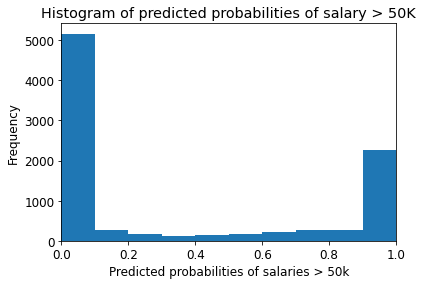

In [81]:
plt.rcParams['font.size']=12
plt.hist(y_pred1,bins=10)
plt.title('Histogram of predicted probabilities of salary > 50K')
plt.xlim(0,1)
plt.xlabel("Predicted probabilities of salaries > 50k")
plt.ylabel('Frequency')


# **ROC - AUC**

Plot ROC curve


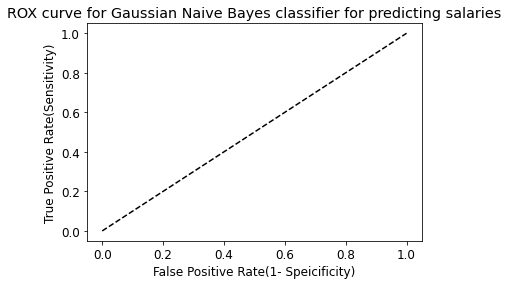

In [83]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds= roc_curve(Y_test,y_pred1,pos_label='>50')
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],"k--")
plt.rcParams['font.size']=12
plt.title('ROX curve for Gaussian Naive Bayes classifier for predicting salaries')
plt.xlabel("False Positive Rate(1- Speicificity)")
plt.ylabel("True Positive Rate(Sensitivity)")
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score
ROC_AUC =roc_auc_score(Y_test,y_pred1)
print('ROC AUC:{:.4f}'.format(ROC_AUC))

ROC AUC:0.8902


# **Interpretation**

In [86]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC =cross_val_score(gnb, X_train,Y_train,cv=5,scoring='roc_auc').mean()
print("Cross Validation ROC AUC:{:.4f}".format(Cross_validated_ROC_AUC))


Cross Validation ROC AUC:0.8923


# **K-Fold cross validation**

In [87]:
scores= cross_val_score(gnb,X_train,Y_train,cv=10,scoring='accuracy')
print('Cross-validation Scores:{}'.format(scores))

Cross-validation Scores:[0.81676136 0.79829545 0.79014685 0.81288489 0.80388441 0.79062056
 0.80767409 0.7925154  0.79630507 0.80909522]


In [88]:
print('Average cross-validation score:{:.4f}'.format(scores.mean()))

Average cross-validation score:0.8018
